Preprocessing

In [34]:
import pandas as pd
df = pd.read_excel("GooglePlaystore.xlsx")

In [35]:
index_to_remove = df[df["Reviews"] == "3.0M"].index
df = df.drop(index_to_remove)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='raise')

In [36]:
index_to_remove = df[df.eq("Varies with device").any(axis=1)].index
df = df.drop(index_to_remove)

In [37]:
df['Android Ver'] = df['Android Ver'].str.extract(r'^(\d+\.\d+)', expand=False)

In [38]:
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.rstrip('+')
index_to_remove = df[~df['Installs'].str.isdigit()].index
df = df.drop(index_to_remove)
df['Installs'] = pd.to_numeric(df['Installs'], errors='raise')

In [39]:
missing_ratings = df[df['Rating'].isnull()]
index_to_remove = missing_ratings[(missing_ratings['Reviews'] < 100) & (missing_ratings['Installs'] < 50000)].index
df = df.drop(index_to_remove)

missing_ratings = df[df['Rating'].isnull()]
category_avg_ratings = df.groupby('Category')['Rating'].mean()
for index, row in missing_ratings.iterrows():
    category = row['Category']
    if category in category_avg_ratings:
        avg_rating = category_avg_ratings[category]
        df.at[index, 'Rating'] = round(avg_rating, 2)

In [40]:
df['Size'] = df['Size'].apply(lambda x: float(x[:-1]) * 10**6 if x.endswith('M') else float(x[:-1]) * 10**3 if x.endswith('k') else float(x))

Analysis

In [41]:
df.groupby('Category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,59.0,4.358644,0.365322,3.2,4.100,4.40,4.700,5.0
AUTO_AND_VEHICLES,62.0,4.146774,0.569935,2.1,3.900,4.25,4.500,4.9
BEAUTY,40.0,4.291750,0.356175,3.1,4.075,4.30,4.525,4.9
BOOKS_AND_REFERENCE,147.0,4.320136,0.453084,2.7,4.100,4.40,4.600,5.0
BUSINESS,246.0,4.119187,0.662586,1.0,3.825,4.30,4.500,5.0
COMICS,49.0,4.154082,0.550363,2.8,3.800,4.40,4.600,5.0
COMMUNICATION,210.0,4.100952,0.502624,1.0,3.900,4.20,4.400,5.0
DATING,174.0,3.957816,0.664204,1.0,3.600,4.10,4.400,5.0
EDUCATION,110.0,4.392636,0.254395,3.5,4.300,4.40,4.600,4.9


In [42]:
def top_3_free_apps_by_column(df, column):
    free_apps = df[df['Type'] == 'Free']
    top_apps_by_category = pd.DataFrame(columns=['Category', 'App', column])
    for _category, group in free_apps.groupby('Category'):
        top_3_apps = group.nlargest(3, column)
        top_apps_by_category = pd.concat([top_apps_by_category, top_3_apps[['Category', 'App', column]]])
    return top_apps_by_category

In [43]:
top_3_free_apps_by_column(df, 'Rating')

C:\Users\woogy\AppData\Local\Temp\ipykernel_27608\2582632302.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_apps_by_category = pd.concat([top_apps_by_category, top_3_apps[['Category', 'App', column]]])


,Category,App,Rating
8888,ART_AND_DESIGN,Spring flowers theme couleurs d t space,5.0
25,ART_AND_DESIGN,Harley Quinn wallpapers HD,4.8
3982,ART_AND_DESIGN,Cardi B Wallpaper,4.8
55,AUTO_AND_VEHICLES,Tickets SDA 2018 and Exam from the State Traff...,4.9
61,AUTO_AND_VEHICLES,CDL Practice Test 2018 Edition,4.9
...,...,...,...
4038,VIDEO_PLAYERS,"DU Recorder – Screen Recorder, Video Editor, Live",4.8
5244,VIDEO_PLAYERS,AJ Player,4.8
3627,WEATHER,Weather forecast,4.8
3629,WEATHER,Live Weather Pro,4.8


In [44]:
top_3_free_apps_by_column(df, 'Installs')

,Category,App,Installs
12,ART_AND_DESIGN,Tattoo Name On My Photo Editor,10000000
19,ART_AND_DESIGN,ibis Paint X,10000000
45,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",10000000
8289,AUTO_AND_VEHICLES,AutoScout24 - used car finder,10000000
69,AUTO_AND_VEHICLES,Used cars for sale - Trovit,5000000
...,...,...,...
4688,VIDEO_PLAYERS,VivaVideo - Video Editor & Photo Movie,100000000
3677,VIDEO_PLAYERS,Vote for,50000000
4725,WEATHER,Weather & Clock Widget for Android,50000000
3636,WEATHER,Weather –Simple weather forecast,10000000


In [45]:
top_3_free_apps_by_column(df, 'Reviews')

,Category,App,Reviews
19,ART_AND_DESIGN,ibis Paint X,224399
18,ART_AND_DESIGN,FlipaClip - Cartoon animation,194216
45,ART_AND_DESIGN,"Canva: Poster, banner, card maker & graphic de...",174531
79,AUTO_AND_VEHICLES,Tickets + PDA 2018 Exam,197136
8289,AUTO_AND_VEHICLES,AutoScout24 - used car finder,186648
...,...,...,...
4038,VIDEO_PLAYERS,"DU Recorder – Screen Recorder, Video Editor, Live",2588730
4032,VIDEO_PLAYERS,Dubsmash,1971777
4725,WEATHER,Weather & Clock Widget for Android,2371543
5768,WEATHER,Amber Weather,260137


In [46]:
paid_apps = df[df['Type'] == 'Paid']
average_price = paid_apps['Price'].mean()
max_price = paid_apps['Price'].max()
min_price = paid_apps['Price'].min()

average_price, max_price, min_price

(15.139163763066062, 400, 0.99)

Visualization

In [47]:
from matplotlib import pyplot as plt

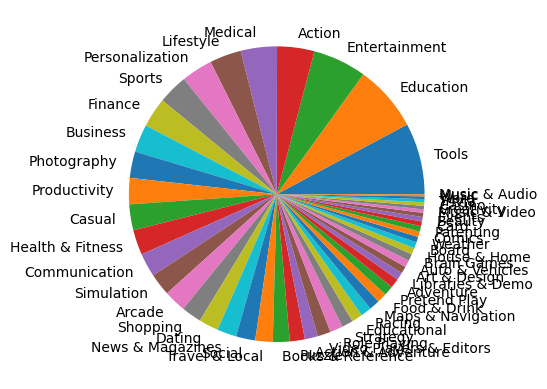

In [48]:
df['Genres'] = df['Genres'].apply(lambda x: [genre.strip() for genre in x.split(';')])
df_exploded = df.explode('Genres')
genre_counts = df_exploded['Genres'].value_counts()

genre_counts.plot(kind='pie')
plt.ylabel('')
plt.show()

In [49]:
genre_counts

Genres
Tools                      633
Education                  585
Entertainment              474
Action                     330
Medical                    321
Lifestyle                  280
Personalization            277
Sports                     264
Finance                    263
Business                   246
Photography                234
Productivity               232
Casual                     229
Health & Fitness           222
Communication              210
Simulation                 197
Arcade                     196
Shopping                   178
Dating                     174
News & Magazines           171
Social                     170
Travel & Local             155
Books & Reference          149
Puzzle                     133
Action & Adventure         116
Video Players & Editors    116
Role Playing               114
Strategy                    99
Educational                 97
Racing                      95
Maps & Navigation           94
Food & Drink                86
P

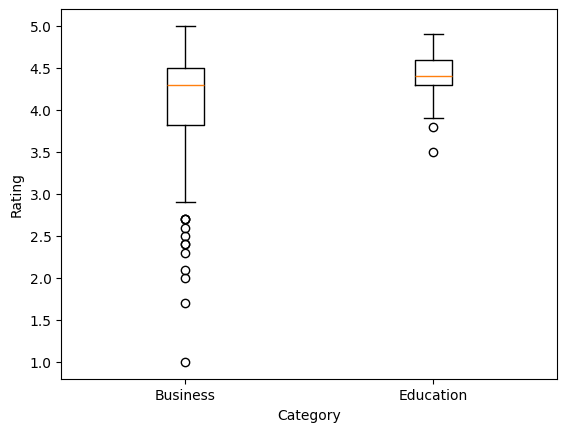

In [50]:
business_ratings = df[df['Category'].str.upper() == 'BUSINESS']['Rating']
education_ratings = df[df['Category'].str.upper() == 'EDUCATION']['Rating']

plt.boxplot([business_ratings, education_ratings], labels=['Business', 'Education'])
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()